<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment3/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Q1 (Fraud-detection using logistic regression & SVM)
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

address = '/content/drive/My Drive/ISLR Course - Fall 2020/Assignment3/creditcard.csv'
credit_card = pd.read_csv(address)
'''
f, ax = plt.subplots(figsize=(7, 5))
sn.countplot(x='Class', data=credit_card)
_ = plt.title('# Fraud vs NonFraud')
_ = plt.xlabel('Class (1==Fraud)')
'''
numClass0 = credit_card['Class'].value_counts()[0]
numClass1 = credit_card['Class'].value_counts()[1]

print('Number of Class 0 = ', numClass0)
print('Number of Class 1 = ', numClass1)

Number of Class 0 =  181766
Number of Class 1 =  365


## Preprocessing

In [3]:
from sklearn.model_selection import train_test_split

X = credit_card.drop(columns='Class', axis=1)
y = credit_card.Class.values

np.random.seed(seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Part 3 - SVM

### Linear SVM

In [4]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix 

scaler = StandardScaler()
classifier = svm.SVC(kernel='linear', tol=1e-2, max_iter=2000) 
classifier.fit(scaler.fit_transform(X_train), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=2000, probability=False, random_state=None, shrinking=True,
    tol=0.01, verbose=False)

### rbf kernel

Train accuracy: 99.9693 %
Test accuracy: 99.9429 %


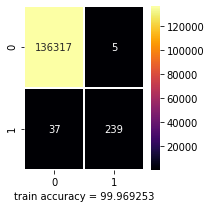

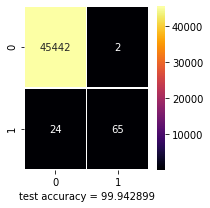

In [5]:
scaler = StandardScaler()
classifier = svm.SVC(kernel='rbf')
classifier.fit(scaler.fit_transform(X_train), y_train)

y_train_pred = classifier.predict(scaler.fit_transform(X_train))
train_accuracy = accuracy_score(y_train, y_train_pred)*100
confusionMatrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('train accuracy = {:4f}'.format(train_accuracy))
plt.tight_layout()
print('Train accuracy: %.4f %%' % train_accuracy)

y_test_pred = classifier.predict(scaler.fit_transform(X_test))
test_accuracy = accuracy_score(y_test, y_test_pred)*100
confusionMatrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('test accuracy = {:4f}'.format(test_accuracy))
plt.tight_layout()
print('Test accuracy: %.4f %%' % test_accuracy)

### poly kernel

Train accuracy: 99.9795 %
Test accuracy: 99.9473 %


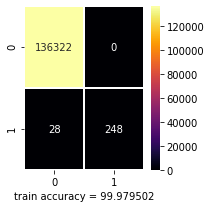

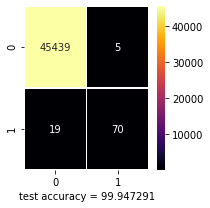

In [6]:
scaler = StandardScaler()
classifier = svm.SVC(kernel='poly', C=2)
classifier.fit(scaler.fit_transform(X_train), y_train)

y_train_pred = classifier.predict(scaler.fit_transform(X_train))
train_accuracy = accuracy_score(y_train, y_train_pred)*100
confusionMatrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('train accuracy = {:4f}'.format(train_accuracy))
plt.tight_layout()
print('Train accuracy: %.4f %%' % train_accuracy)

y_test_pred = classifier.predict(scaler.fit_transform(X_test))
test_accuracy = accuracy_score(y_test, y_test_pred)*100
confusionMatrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('test accuracy = {:4f}'.format(test_accuracy))
plt.tight_layout()
print('Test accuracy: %.4f %%' % test_accuracy)